In [57]:
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv('DataSets/drug-classification.csv')
df.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC


In [59]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:>

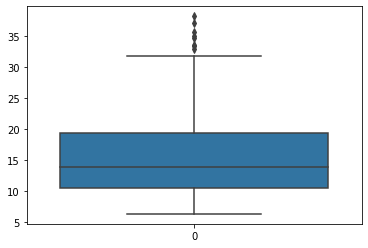

In [60]:
import seaborn as sns
sns.boxplot(df.Na_to_K)

In [61]:
df.columns = df.columns.str.lower()
df.sex = df.sex.str.lower()
df.bp = df.bp.str.lower()
df.cholesterol = df.cholesterol.str.lower()
df.drug = df.drug.str.lower()
df

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,drugy
1,47,m,low,high,13.093,drugc
2,47,m,low,high,10.114,drugc
3,28,f,normal,high,7.798,drugx
4,61,f,low,high,18.043,drugy
...,...,...,...,...,...,...
195,56,f,low,high,11.567,drugc
196,16,m,low,high,12.006,drugc
197,52,m,normal,high,9.894,drugx
198,23,m,normal,normal,14.020,drugx


In [62]:
df.sex.value_counts()

m    104
f     96
Name: sex, dtype: int64

In [63]:
df.bp.value_counts()

high      77
low       64
normal    59
Name: bp, dtype: int64

In [64]:
df.cholesterol.value_counts()

high      103
normal     97
Name: cholesterol, dtype: int64

In [65]:
df.drug.value_counts()

drugy    91
drugx    54
druga    23
drugc    16
drugb    16
Name: drug, dtype: int64

In [66]:
# outliers removal:

q3 = df.na_to_k.quantile(0.75)
q1 = df.na_to_k.quantile(0.25)

iqr = q3-q1

upper = q3+iqr*1.5
median = df.na_to_k.median
print(median)

<bound method NDFrame._add_numeric_operations.<locals>.median of 0      25.355
1      13.093
2      10.114
3       7.798
4      18.043
        ...  
195    11.567
196    12.006
197     9.894
198    14.020
199    11.349
Name: na_to_k, Length: 200, dtype: float64>


In [67]:
df['na_to_k'] = np.where(df['na_to_k']>upper, 25.355, df['na_to_k'])

In [68]:
df.na_to_k.dtype

dtype('float64')

<AxesSubplot:>

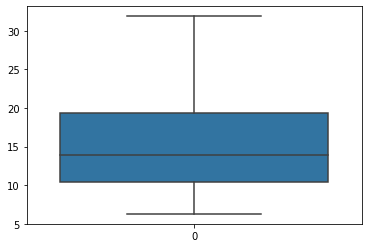

In [69]:
sns.boxplot(df.na_to_k)

In [70]:
df.head(3)

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,drugy
1,47,m,low,high,13.093,drugc
2,47,m,low,high,10.114,drugc


In [71]:
df.dtypes

age              int64
sex             object
bp              object
cholesterol     object
na_to_k        float64
drug            object
dtype: object

In [72]:
# converting objects/ Lable encoding:

from sklearn.preprocessing import LabelEncoder

print(df.sex.unique())
le1 = LabelEncoder()
df['sex'] = le1.fit_transform(df['sex'])
print(df.sex.unique())

print(df.bp.unique())
le2= LabelEncoder()
df['bp'] = le2.fit_transform(df['bp'])
print(df.bp.unique())

print(df.cholesterol.unique())
le3 = LabelEncoder()
df['cholesterol'] = le3.fit_transform(df['cholesterol'])
print(df.cholesterol.unique())

print(df.drug.unique())
le4 = LabelEncoder()
df['drug'] = le4.fit_transform(df['drug'])
print(df.drug.unique())

df.dtypes

['f' 'm']
[0 1]
['high' 'low' 'normal']
[0 1 2]
['high' 'normal']
[0 1]
['drugy' 'drugc' 'drugx' 'druga' 'drugb']
[4 2 3 0 1]


age              int64
sex              int32
bp               int32
cholesterol      int32
na_to_k        float64
drug             int32
dtype: object

In [73]:
df.shape, df.head(4)

((200, 6),
    age  sex  bp  cholesterol  na_to_k  drug
 0   23    0   0            0   25.355     4
 1   47    1   1            0   13.093     2
 2   47    1   1            0   10.114     2
 3   28    0   2            0    7.798     3)

In [74]:
# splitting:

x = df.iloc[:, 0:5]
y = df.iloc[:, 5:6]

In [75]:
x.head(2)

,age,sex,bp,cholesterol,na_to_k
0,23,0,0,0,25.355
1,47,1,1,0,13.093


In [76]:
y.head(2)

,drug
0,4
1,2


In [77]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.155,random_state=15)

In [78]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((169, 5), (31, 5), (169, 1), (31, 1))

In [79]:
# model creation:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Dense(5, activation='relu'))

model.add(Dense(81, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(27, activation='relu'))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=150, batch_size=50, validation_data=([xtest, ytest]), verbose=1)

Epoch 1/150


4/4 [==============================] - 0s 43ms/step - loss: 3.1975 - accuracy: 0.4438 - val_loss: 2.0108 - val_accuracy: 0.5161
Epoch 2/150
4/4 [==============================] - 0s 8ms/step - loss: 2.1295 - accuracy: 0.4438 - val_loss: 1.4379 - val_accuracy: 0.5161
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 1.5716 - accuracy: 0.4438 - val_loss: 1.1540 - val_accuracy: 0.5161
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 1.3602 - accuracy: 0.4556 - val_loss: 1.0992 - val_accuracy: 0.5161
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 1.3010 - accuracy: 0.5385 - val_loss: 1.0571 - val_accuracy: 0.5161
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 1.2708 - accuracy: 0.4438 - val_loss: 1.0595 - val_accuracy: 0.5161
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 1.2372 - accuracy: 0.4438 - val_loss: 1.0724 - val_accuracy: 0.5161
Epoch 8/150
4/4 [===================

In [91]:
model.save('Models/drugmodel.h5')

In [52]:
model.predict(xtest)
print()

In [53]:
xtest.head(4)

,age,sex,bp,cholesterol,na_to_k
49,28,0,1,0,19.796
191,23,1,0,0,8.011
12,43,1,1,0,15.376
172,39,0,2,1,17.225


In [80]:
# ['f' 'm']
# [0 1]
# ['high' 'low' 'normal']
# [0 1 2]
# ['high' 'normal']
# [0 1]
# ['drugy' 'drugc' 'drugx' 'druga' 'drugb']
# [4 2 3 0 1]

In [85]:
pred = model.predict([[36,0,0,0,11.198]])
print(pred)
print(np.argmax(pred))
ind = np.argmax(pred)
ar = ['druga','drugb','drugc','drugx', 'drugy']
ar[ind]

[[0.567227   0.17501386 0.12853202 0.05790423 0.07132292]]
0


'druga'

In [90]:
pred = model.predict([[77,1,0,1,11.343]])
# print(np.argmax(pred))
ind = np.argmax(pred)
ar = ['druga','drugb','drugc','drugx', 'drugy']
ar[ind]

'drugb'